In [36]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

In [38]:
#Looking at data
df = pd.read_csv('readable.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 12 columns):
Unnamed: 0        3517 non-null int64
Ad Clicks         3506 non-null float64
Ad Impressions    3446 non-null float64
Ad Spend          2730 non-null object
Ad Text           3365 non-null object
Age               3517 non-null object
Date              3346 non-null object
Interests         2644 non-null object
Language          1608 non-null object
Location          3505 non-null object
Number            3517 non-null object
Placements        3398 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 329.8+ KB


In [40]:
#Cleaning Ad Clicks
df['Ad Clicks'] = df['Ad Clicks'].fillna(value=0)
df['Ad Clicks'] = df['Ad Clicks'].astype(int)
#Cleaning Ad Clicks
df['Ad Impressions'] = df['Ad Impressions'].fillna(value=0)
df['Ad Impressions'] = df['Ad Impressions'].astype(int)

In [41]:
#In Ad spend column making 0 out of NaNs
df['Ad Spend'] = df['Ad Spend'].fillna(value=0)
def fillempties(elem):
    elem = str(elem)
    elem = int(elem.replace(' ', '.').replace(';', '').split('.')[0])
    return elem
df['Ad Spend'] = df['Ad Spend'].apply(fillempties)

In [42]:
#Age

df['Age'].value_counts()
def agemin(elem):
    if elem == 'Age: 18 65+':
        elem = elem.replace('Age: ', '').split(' ')[0]
    else:
        elem = elem.replace('Age: ', '').replace('Age: ', '').split('-')[0].strip()
    return int(elem)
df['AgeMin'] = df['Age'].apply(agemin)

def agemax(elem):
    if elem == 'Age: 18 65+':
        elem = elem.replace('Age: ', '').replace('+', '').split(' ')[1]
    else:
        elem = elem.replace('Age: ', '').replace('Age: ', '').replace('+', '').split('-')[1].strip()
    return int(elem)

df['AgeMax'] = df['Age'].apply(agemax)

In [43]:
# Date
df['Date'] = df['Date'].fillna(value='N/A')
def remove(elem):
    elem = elem[:17]
    if elem == 'N/A':
        return '01/01/01 01:01:01'
    else:
        return elem
df['Date'] = df['Date'].apply(remove)
df.index = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M:%S')

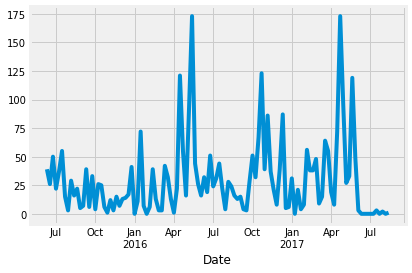

In [44]:
df[df['Date']!= '01/01/01 01:01:01'].resample('W')['Number'].count().plot()

In [45]:
df['Location'] = df['Location'].fillna(value='N/A')
#Cleaning location column
def defsplit(elem):
    elem = elem.split('Interests:')[0]
    elem = elem.split('Excluded Connections:')[0].replace('\\n','')
    elem = elem.replace('Location - Living  In:', '')
    elem = elem.replace('Location: ', '').replace('Location*', '').strip()
    return elem
df['Cleaned location'] = df['Location'].apply(defsplit)

In [46]:
# Interests
df['Interests'] = df['Interests'].fillna(value='N/A')
def remove(elem):
    elem = elem.replace('Interests: ', '')
    if ('St.' in elem or
        'Jr.' in elem):
        elem = elem.replace(' or ', ',').split(',')
    else: 
        elem = elem.replace(' or ', ','.replace('. ', ',')).split(',')
    return elem
df['Interests'] = df['Interests'].apply(remove)
lst = list(df['Interests'])
flat_list = [item for sublist in lst for item in sublist]
fl = []
for elem in flat_list:
    elem = elem.upper().replace(' OR', '').strip()
    fl.append(elem)
df_tags = pd.DataFrame(fl)
df_tags.columns = ['Tags']
df_tags['Tags'].value_counts().count()

476

In [47]:
#Language
df['Language'].value_counts()

Language: English (UK) or English (US)                              1181
Language: English (UK) or English (US)                               211
Language: English (US)                                               141
Language: English (US)                                                32
Language: English (UK), Arabic or English (US)                        27
Language: English (UK); Arabic or English (US)                         9
Language: Spanish, English (UK), English (US) or Spanish (Spain)       6
Language: English (UK), Arabic or English (US)                         1
Name: Language, dtype: int64

In [48]:
#Location
df['Location'] = df['Location'].fillna(value='N/A')
def defsplit(elem):
    elem = elem.split('Interests:')[0]
    elem = elem.split('Excluded Connections:')[0].replace('\\n','')
    elem = elem.replace('Location - Living  In:', '')
    elem = elem.replace('Location: ', '').replace('Location*', '').strip()
    return elem
df['Location'] = df['Location'].apply(defsplit)

In [49]:
df['Location'].value_counts()

United States                                                                                                                                                                                                                                                                               2571
United States: New York (+25 mi) New York                                                                                                                                                                                                                                                     55
United States: Baltimore Maryland; Ferguson, St. Louis Missouri;Cleveland Ohio                                                                                                                                                                                                                52
United States: Texas                                                                                                                 

In [50]:
df.to_csv('readable_cleaned.csv')